In [127]:
import os

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
from sklearn import metrics


from sklearn import preprocessing, neighbors, grid_search, cross_validation 
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, cross_validation
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier




import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')



#  Problem Statement: 
#### The relevant goal of this data science project is better understand US Census Bureau Data. In essence, is there a model that we can create to predict who is more likely to make over $50K/Year in income? My hypothesis is that with proper utilization of data science methods we can accomplish our goal.    




In [72]:
df = pd.read_csv(os.path.join('..', 'datasets', 'adult.csv'))

In [73]:
df = df[df.occupation != '?']


In [74]:
df

,age,workclass,fnlwgt,education,education.num,...,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,...,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,...,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,...,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,...,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,...,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,...,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,...,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,...,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,...,0,0,40,United-States,<=50K


In [75]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

### Data Dictionary For Adult Census Income Data
Variable | Type of Variable | Description 
---|---|---
`age` | Continuous | Age of Participant 
   `workclass` | Categorical | Defined workclass of individual / (Private, Self-Employed, Federal - Gov, Local - Gov, State - gov, Without) 
   `fnlwgt` | Continuous | Weights assigned to any specified socio - economic characterisitcs of the population.. People with similar demographics have similar weights 
   `education Level` | Categorical |  (Bachelors, Some - College, 11th.. etc)
   `education-num` | Continuous |  Numerical value assigned to education level... 16 being the highest level of education to 1 being the lowest 
   `martial-status` | Categorical | (Married, Divorced, Never - married, Seperated, Widowed, Married - Spouse - absent)
   `occupation` | Categorical | (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
   `relationship` | Categorical | (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
   `race` | Categorical | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
   `sex` | Categorical | (Female, male)
   `capital-gain` | Continuous | capital gain in past year
   `capital-loss` | Continuous | capital loss in past year 
   `hours-per-week` | Continuous | how many hours worked a week 
   `native-country` | Categorical |  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
    





In [76]:
#Rename columns to get rid of '.' and make cleaner 
df.rename(columns = {'education.num': 'education_num',
                              'marital.status': 'marital_status',
                              'capital.gain': 'capital_gain',
                              'hours.per.week': 'hours_week',
                                'capital.loss' : 'capital_loss',
                                'native.country': 'native_country'}, inplace = True)


In [77]:
df.isnull().sum().sum()
#check for NaN

0

In [78]:
## Get rid of ambigious data that does not provide in our goal to predict income levels... 

df.drop('native_country',axis = 1, inplace = True)
df.drop('fnlwgt',axis = 1, inplace = True)

In [79]:
pd.crosstab(df.occupation,df.income)


income,<=50K,>50K
occupation,,
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
...,...,...
Prof-specialty,2281,1859
Protective-serv,438,211
Sales,2667,983


In [80]:
##Get Rid of categorical variables with a lot of distinct variables
df.drop('occupation', axis = 1, inplace = True)

In [81]:
df['marital_status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)

In [82]:
## Group Marital status to Married or Not Married for better analytical purposes... 
df['marital_status'] = df['marital_status'].replace({'Married-civ-spouse': 'Married', 
                                                     'Married-spouse-absent':'Married',
                                                     'Married-AF-spouse' : 'Married',
                                                    'Widowed' : 'Not Married',
                                                    'Divorced' : 'Not Married',
                                                    'Separated' : 'Not Married',
                                                    'Never-married' : 'Not Married'}, regex=True)




In [83]:
df.marital_status.value_counts()

Not Married    15969
Married        14749
Name: marital_status, dtype: int64

In [84]:
## Transform Marital Status from a categorical variable  into a binary one 
df['marital_status'] = df['marital_status'].replace({'Not Married': 0, 'Married':1}, regex=True)


In [85]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [86]:
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})

In [87]:
df.drop('race',axis = 1, inplace = True)

In [88]:
df.education.value_counts()

HS-grad         9968
Some-college    6775
Bachelors       5182
Masters         1675
Assoc-voc       1321
                ... 
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [89]:
df['education_num'].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])

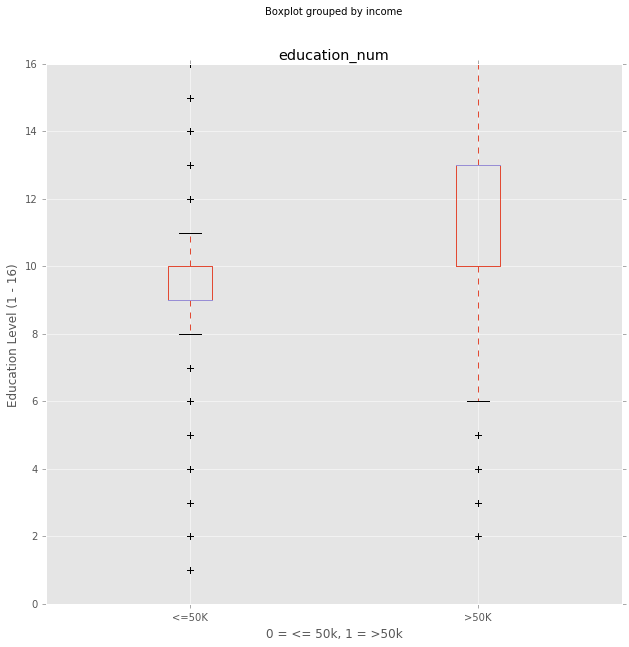

In [90]:
education_box = df.boxplot('education_num', 'income', figsize = (10,10), )
education_box.set_xlabel('0 = <= 50k, 1 = >50k')
education_box.set_ylabel('Education Level (1 - 16)')

In [91]:
df.describe()

,age,education_num,marital_status,capital_gain,capital_loss,hours_week,race_num
count,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,10.130314,0.480142,1106.037079,88.910216,40.949313,0.218341
std,13.118227,2.562469,0.499614,7497.863364,405.657203,11.985382,0.621965
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,1.000000,99999.000000,4356.000000,99.000000,4.000000


In [92]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

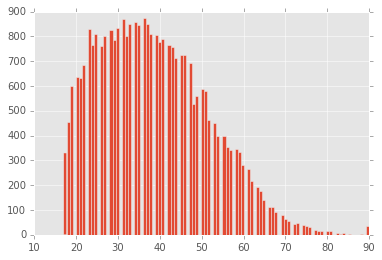

In [93]:
df['age'].hist(bins = 100)
#Distrubtion of Age 

In [94]:
df.age.mean()
#Average Age

38.44358356663845

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120f6b4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f1fd050>]], dtype=object)

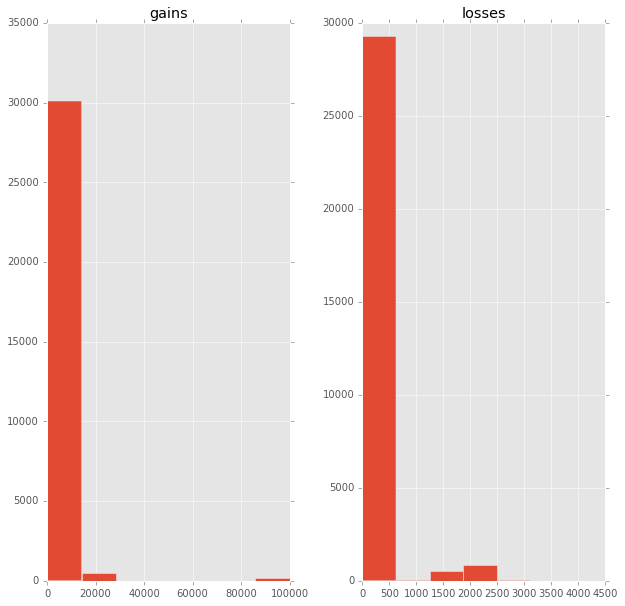

In [95]:
capitals = pd.DataFrame({"gains":df['capital_gain'], "losses":df['capital_loss']})
capitals.hist(bins = 7, figsize = (10,10))

In [96]:
pd.crosstab(df.sex,df.income).sort_index(axis = 0, ascending = False)


income,<=50K,>50K
sex,,
Male,14265,6523
Female,8803,1127


In [97]:
## Turn Sex from Categorical to binary data 
df['sex'] = df['sex'].replace({'Female': 0, 'Male':1}, regex=True)



In [98]:
pd.crosstab(df.education,df.income).sort_index(axis = 0, ascending = False)


income,<=50K,>50K
education,,
Some-college,5423,1352
Prof-school,143,415
Preschool,46,0
Masters,734,941
HS-grad,8339,1629
...,...,...
5th-6th,289,14
1st-4th,150,6
12th,362,31


In [99]:
#Turn Categorical Variables Income Into binary data
df['income'] = df['income'].replace({'<=50K': 0, '>50K':1}, regex=True)

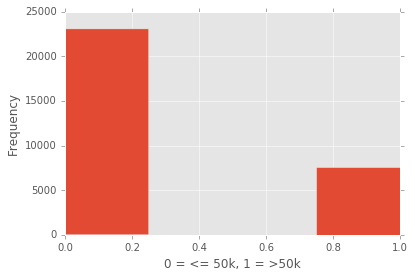

In [100]:
Income_hist = df.income.plot(kind = 'hist', bins = 4)
Income_hist.set_xlabel("0 = <= 50k, 1 = >50k")

In [101]:
df.income.mean()

0.24903965101894654

In [102]:
df.corr()

,age,education_num,marital_status,sex,capital_gain,capital_loss,hours_week,income,race_num
age,1.000000,0.043567,0.310900,0.082117,0.080392,0.060409,0.101879,0.242431,-0.036374
education_num,0.043567,1.000000,0.072574,0.007443,0.124247,0.079321,0.151241,0.334640,-0.039751
marital_status,0.310900,0.072574,1.000000,0.425157,0.084024,0.079240,0.220358,0.435584,-0.053254
sex,0.082117,0.007443,0.425157,1.000000,0.047757,0.047010,0.230321,0.216626,-0.065004
capital_gain,0.080392,0.124247,0.084024,0.047757,1.000000,-0.032332,0.079548,0.221871,-0.008203
capital_loss,0.060409,0.079321,0.079240,0.047010,-0.032332,1.000000,0.053961,0.151461,-0.018872
hours_week,0.101879,0.151241,0.220358,0.230321,0.079548,0.053961,1.000000,0.228547,-0.034405
income,0.242431,0.334640,0.435584,0.216626,0.221871,0.151461,0.228547,1.000000,-0.067332
race_num,-0.036374,-0.039751,-0.053254,-0.065004,-0.008203,-0.018872,-0.034405,-0.067332,1.000000


In [103]:
df.corr().income.sort_values(ascending = False).head()
## Should not include marital_status as it best predicts income the most.. Thus we should not include it in our model

income            1.000000
marital_status    0.435584
education_num     0.334640
age               0.242431
hours_week        0.228547
Name: income, dtype: float64

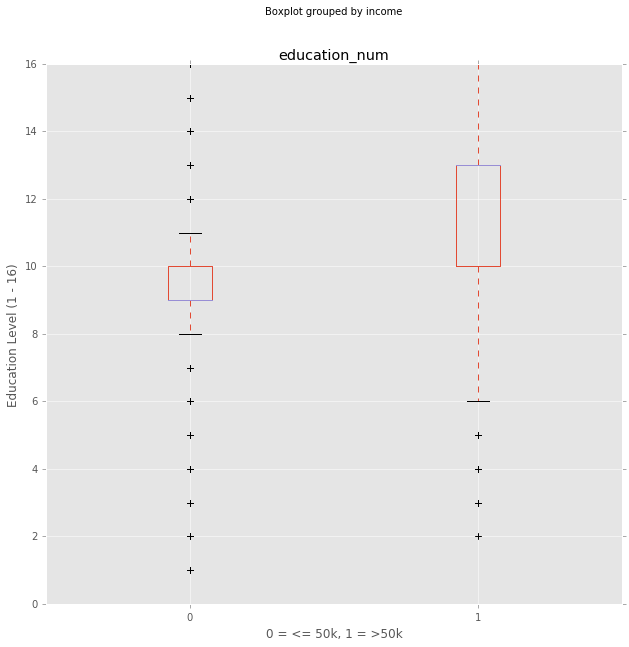

In [104]:
education_box = df.boxplot('education_num', 'income', figsize = (10,10), )
education_box.set_xlabel('0 = <= 50k, 1 = >50k')
education_box.set_ylabel('Education Level (1 - 16)')

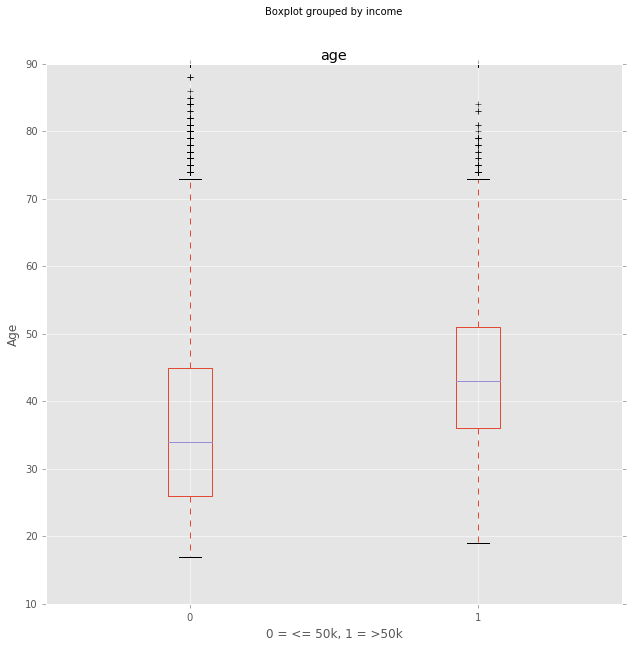

In [105]:
age_box = df.boxplot('age', 'income', figsize = (10,10), )
age_box.set_xlabel('0 = <= 50k, 1 = >50k')
age_box.set_ylabel('Age')

In [106]:
pd.crosstab(df.workclass,df.income)

income,0,1
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0


In [107]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64

In [108]:
## Create new column transforming categorical data into binary data for a better model 
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})


In [109]:
df.workclass_num.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [110]:
## Create new column transforming categorical data into binary data for a better model 

df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})


In [111]:
df.corr().income.sort_values(ascending = False)

income            1.000000
rel_num           0.448992
marital_status    0.435584
education_num     0.334640
age               0.242431
                    ...   
capital_gain      0.221871
sex               0.216626
capital_loss      0.151461
workclass_num     0.114225
race_num         -0.067332
Name: income, dtype: float64

# USING LOGISTIC REGRESSION TO PREDICT INCOME

In [112]:
##Split The Data into Training and Testing Sets before utilization of models
train = df.sample(frac = .6, random_state = 0)
test = df.drop(train.index)


In [113]:
train_df = pd.get_dummies(train)
test_df = pd.get_dummies(test)


In [114]:
train_df.head()

,age,education_num,marital_status,sex,capital_gain,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
18261,41,9,1,1,0,...,0.0,0.0,0.0,0.0,0.0
23840,21,10,0,1,0,...,0.0,0.0,1.0,0.0,0.0
2066,48,15,1,1,15024,...,0.0,0.0,0.0,0.0,0.0
15775,64,9,1,0,0,...,0.0,0.0,0.0,0.0,1.0
31667,42,9,0,1,0,...,0.0,0.0,1.0,0.0,0.0


In [115]:
train_X = train_df[ ['sex', 'age','hours_week', 'education_num'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

test_X = test_df[['sex', 'age','hours_week', 'education_num' ] ]
scaler = preprocessing.MinMaxScaler().fit(test_X)
test_X = scaler.transform(test_X)

train_c = train_df.income
test_c = test_df.income

model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

print model.intercept_
print model.coef_





[-7.67212609]
[[ 1.1475798   3.4436751   3.22271221  5.0560464 ]]


In [116]:
print 'training misclassification =', 1 - model.score(train_X, train_c)



training misclassification = 0.20150832836


* This indicates that we are labeling incorrectly observations 24% of the time... 

In [117]:
print 'testing  misclassification =', 1 - model.score(test_X, test_c)


testing  misclassification = 0.205827297143


- This indicates that we are making slightly more errors in classiflying individuals in our test set than our training set in the testing set


In [118]:
names_X = ['sex', 'age','hours_week', 'education_num']

In [119]:
zip(names_X, np.exp(model.coef_[0]))



[('sex', 3.1505587055993161),
 ('age', 31.301784123251377),
 ('hours_week', 25.096093722892135),
 ('education_num', 156.96869600631788)]

# USING KNN TO PREDICT INCOME

In [120]:
##Split The Data into Training and Testing Sets before utilization of models
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

In [121]:
train_df = pd.get_dummies(train)
test_df = pd.get_dummies(test)

## Very important to scale and preprocess data as it will take very long to execute the model without doing so...  

In [122]:
train_X = train_df[ ['age', 'sex', 'education_num','hours_week'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

test_X = test_df[ ['age', 'sex', 'education_num','hours_week'] ]

scaler = preprocessing.MinMaxScaler().fit(test_X)

test_X = scaler.transform(test_X)

train_c = train_df.income

test_c = test_df.income

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(train_X, train_c)

accuracy = model.score(train_X, train_c)
misclassification_error = 1 - accuracy

misclassification_error 





0.18099940317942598

###  This is only the training error and may be skewed due to overfitting.. Validation and Cross validation provide a more accurate measure 

In [123]:
train_X.shape[0]

18431

In [124]:
kf = KFold(len(train_X), n_folds=10, shuffle=False)
print('KFold CrossValScore %s' % cross_val_score(model, train_X, train_c, cv=kf).mean())

KFold CrossValScore 0.779121269081


In [128]:

k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_c)
    y_pred = knn.predict(test_X)
    scores.append(metrics.accuracy_score(test_c, y_pred))
print(scores.index(max(scores)), max(scores))




(24, 0.80141613087002528)
